# Factor Plot

Welcome back to another lecture on *Data Visualization with Seaborn*! This lecture is kind of a continuation to **<span style="color:red">FacetGrid</span>** that we had been discussing in previous lecture. Today our major emphasis is once again going to be on plotting *Categorical Data*. 

Well, you might think that we have already done enough of these in previous section, when we covered visualization methods like **Swarm Plot**, **Strip Plot**, **Box Plot**, **Violin Plot**, **Bar Plot** and **Point Plot**. News for you today is that all the above mentioned plots are generally considered *low-level methods* as they all plot onto a specific pair of *Matplotlib axes*.

Today we shall discuss a higher level function, i.e. **<span style="color:red">Factor Plot</span>**, which combines all the *low-level functions* with our **FacetGrid** to apply a *Categorical plot* across a grid of figure panels on **[Tidy DataFrame](http://vita.had.co.nz/papers/tidy-data.pdf)**. I shall attach a link in our notebook for you to better assess *<span style="color:green">Tidy Data</span>* as defined by official page.

Let us now dive little deeper to understand this *high-level* **Factor Plot**; not actually in terms of underlying code but in terms of the conceptual foundation, where it majorly holds relevance to **Factor Analysis**. To give you an overview, **[Factor Analysis](https://en.wikipedia.org/wiki/Factor_analysis)** is again a *statistical method* that describes *variability* among observed, correlated variables in terms of a potentially lower number of unobserved variables, which are referred to as **Factors**. 

**Factor Analysis** searches for similar Joint variations in response to an unobserved set of **[Latent variables](https://en.wikipedia.org/wiki/Latent_variable)**. The term **Latent** refers to the fact that even though these variables were not measured directly in a research design, still they are the ultimate goal of that project. Hence, the observed variables are modelled as *Linear combinations of potential factors*, plus *"error"* terms. 

Our Factor analysis aims to find such independent Latent variables and the theory behind these methods is that the *Information* gained about the inter-dependencies between observed variables can be used later to reduce the set of variables in a dataset. In short, we may say that Factor analysis is related to **Principal Component Analysis (PCA)**, though those two are not identical. 

During visualization, A *Factor plot* simply drafts the same plot generated for different response and factor variables and arranged on a single page. Here, the underlying plot generated can be any *Univariate* or *Bivariate* plot, and *Scatter Plot* serves this purpose quite frequently than others.

Let us now get our package dependancies and plot a simple Factor Plot to understand the parameters offered by Seaborn to make our task easier:

In [1]:
# Importing intrinsic libraries:
import numpy as np
import pandas as pd
np.random.seed(44)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks", palette="hsv")
import warnings
warnings.filterwarnings("ignore")

# Let us also get tableau colors we defined earlier:
tableau_20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
         (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
         (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
         (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
         (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Scaling above RGB values to [0, 1] range, which is Matplotlib acceptable format:
for i in range(len(tableau_20)):
    r, g, b = tableau_20[i]
    tableau_20[i] = (r / 255., g / 255., b / 255.)

In [2]:
# Loading Built-in Dataset:
exercise = sns.load_dataset("exercise")

# Pre-viewing Dataset:
exercise.head(10)
#exercise.columns

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
5,5,2,low fat,93,30 min,rest
6,6,3,low fat,97,1 min,rest
7,7,3,low fat,97,15 min,rest
8,8,3,low fat,94,30 min,rest
9,9,4,low fat,80,1 min,rest


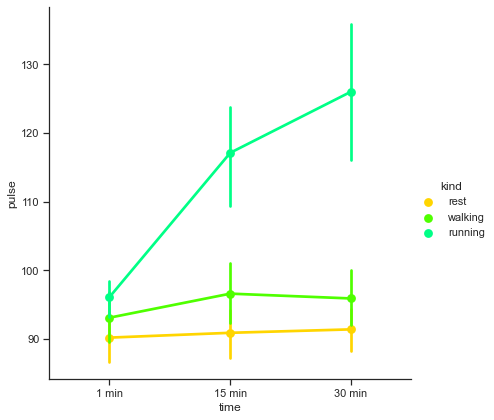

In [3]:
# Creating a basic Factor Plot:
sns.factorplot(x="time", y="pulse", hue="kind", data=exercise, size=6)

This looks quite informative and we already know how to interpret a **Point Plot** that we have on screen right now. If an individual is at **`rest`**, his/her **`pulse`** remains pretty constant at approximately 90, when measured for a **`time`** interval from 1 minute to half an hour. Even while **`walking`**, the **`pulse`** soars high for first **`15 minutes`**, but then stabilizes around 93, and then remains constant at that **`pulse`**. But the story is totally different when the individual is **`running`**, because the pulse then takes a major upwards leap in first **`time`** segment, and constantly keeps pounding with increase in **`time`**. 

Let us now look at the parameters offered by Seaborn to expand our horizon with **Factor Plot**:

**`seaborn.factorplot(x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean>, ci=95, n_boot=1000, units=None, order=None, hue_order=None, row_order=None, col_order=None, kind='point', size=4, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None)`**

The good news is that Seaborn seems to offer almost all the *optional parameters* that we've covered till now; and the other good news is that there isn't any extra parameter for us to fiddle with. So instead, let us play around with few more *Factor Plots* to visualize the difference. As of now, we just have a **Point Plot** on one facet, so we shall eventually even try to draw subplots to get further acquainted with the syntax and corresponding results. There isn't much we need to do in terms of *inference*, so let us run through few examples:

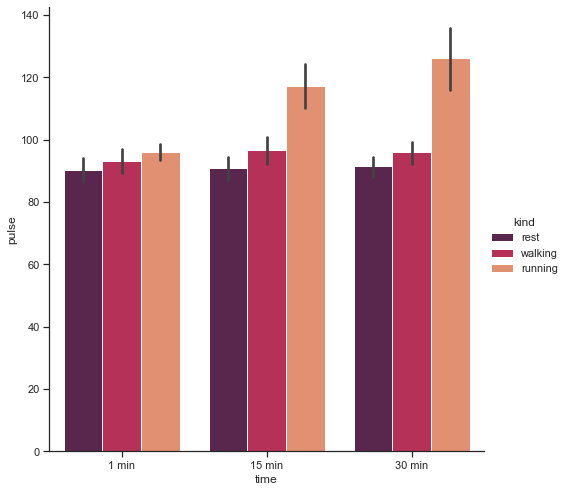

In [4]:
# Let us begin by altering the type of plot to a "BarPlot" on our FactorPlot:
sns.factorplot(x="time", y="pulse", hue="kind", data=exercise, size=7, kind="bar", palette="rocket")

As you would have guessed by now, the **`kind`** parameter by default is for **Point Plot**, but just like this, we may modify it to **`box`**, **`violin`**, **`swarm`**, etc.

Let us now *facet our plot along variable columns in the same row*:

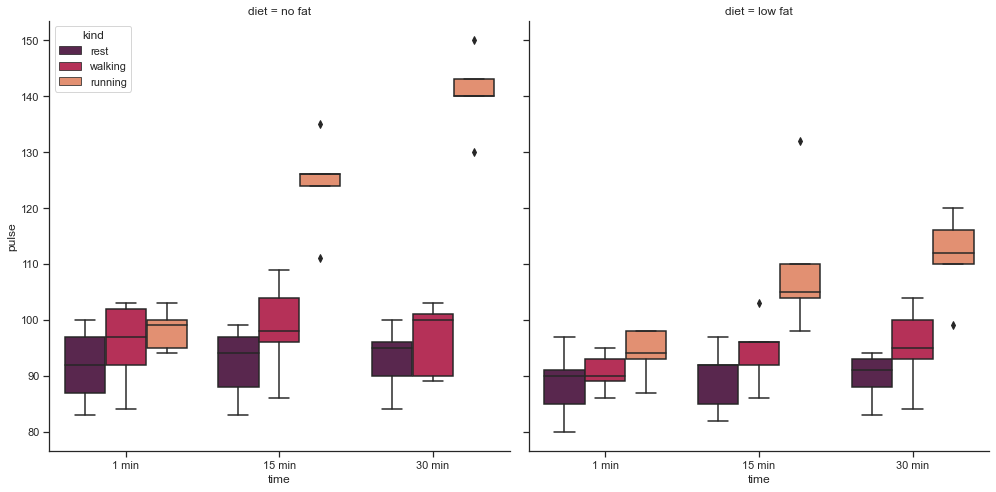

In [5]:
# For a change, here we shall use a "Box Plot", instead of a "Bar Plot" to visualize the difference:
#sns.factorplot(x="time", y="pulse", hue="kind", col="diet", data=exercise, size=6, kind="box", palette="rocket")

# Let us pull our Legend inside the plot:
sns.factorplot(x="time", y="pulse", hue="kind", col="diet", data=exercise, size=7, kind="box", palette="rocket", legend_out=False)

That comfortably divides **`exercise`** datapoints with respect to the *factor* whether they are on **`low fat`** *or* on **`no fat`** *diet*. 

Now let us add in few more *optional parameters* and tweak our presentation, and for this purpose we shall use our *Tips* dataset, so we shall commence by reloading this built-in dataset:

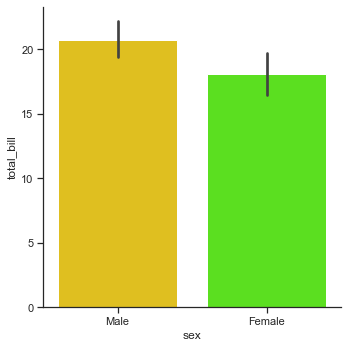

In [6]:
# factorplot is the most general form of a categorical plot. 
#It can take in a kind parameter to adjust the plot type:

# Loading Built-in Tips Dataset:
tips = sns.load_dataset("tips")

sns.factorplot(x='sex', y='total_bill', data=tips, kind='bar')

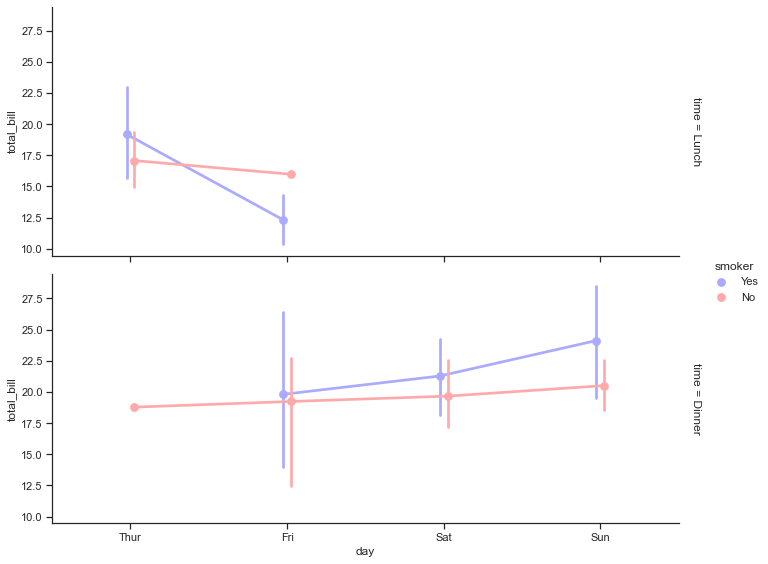

In [7]:
# Let us get all the facets of our grid vertically stacked this time:
sns.factorplot(x="day", y="total_bill", hue="smoker", row="time", data=tips, 
               orient="v", size=4, aspect=2.5, palette="bwr", kind="point", dodge=True, cut=0, bw=.2, margin_titles=True)

Hmmm! So we have a competent plot here presenting the variations.

Let us now try to extemporize few modifications in our **Barplot** that we plotted earlier using **`exercise`** dataset:

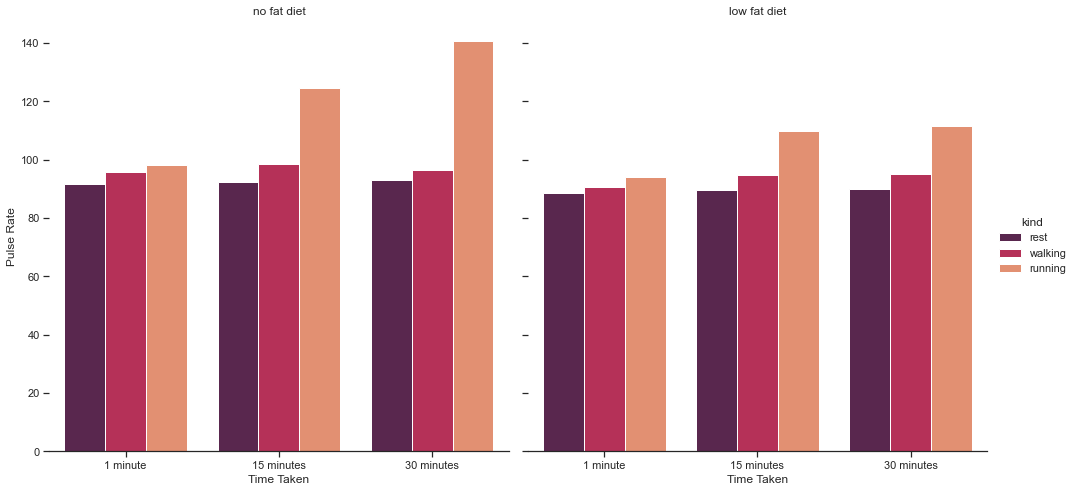

In [8]:
# Let us also assign a variable "ax" to it:
ax = sns.factorplot(x="time", y="pulse", hue="kind", col="diet", data=exercise, size=7, kind="bar", 
                    palette="rocket", ci=None)

# Let us now customize it by using methods on our FacetGrid:
ax.set_axis_labels("Time Taken", "Pulse Rate")
ax.set_xticklabels(["1 minute", "15 minutes", "30 minutes"])
ax.set_titles("{col_name} {col_var}")
ax.despine(left=True)